In [1]:
import json

In [2]:
def get_from_json(filename):
    with open(filename, 'r') as openfile:
        result = json.load(openfile)
    return result

In [3]:
eps_summary     = get_from_json('1_scrapping_black_clover.json')
characters      = get_from_json('2_characters_black_clover.json')
bad_adjectives  = get_from_json('2_bad_adjectives_black_clover.json')
bad_verbs       = get_from_json('2_bad_verbs_black_clover.json')

In [4]:
doc = eps_summary[2]
doc

'A city is being attacked by a giant demon. The First Wizard King then appears and defeats the demon.\nOver the following generations, the Clover Kingdom is protected by a Wizard King, who commands nine squads of Magic Knights. The duty of all is to protect the kingdom, as well as the citizens, with their own lives.\nAsta finishes his thousand swings with the sword he got from his grimoire and proceeds to drink moguro leaf juice. Yuno has been training too, chopping wood and shattering rocks. Both of them want to apply to the Magic Knights Entrance Exam.\nSister Lily and Father Orsi visit Drouot to discuss their foster sons taking the exam. Afterward, Asta and Yuno race each other back to the church, and Nash claims Yuno won.\nThe next day while Asta is training, Nash approaches him and says that orphans are too weak and poor to dream of becoming Magic Knights. However, Asta yells at him not to give up, declaring that he will prove anyone can. That night, Lily and Orsi prepare a specia

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/pauli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
from nltk import word_tokenize
from nltk import sent_tokenize

In [7]:
doc_sent = sent_tokenize(doc)
doc_sent

['A city is being attacked by a giant demon.',
 'The First Wizard King then appears and defeats the demon.',
 'Over the following generations, the Clover Kingdom is protected by a Wizard King, who commands nine squads of Magic Knights.',
 'The duty of all is to protect the kingdom, as well as the citizens, with their own lives.',
 'Asta finishes his thousand swings with the sword he got from his grimoire and proceeds to drink moguro leaf juice.',
 'Yuno has been training too, chopping wood and shattering rocks.',
 'Both of them want to apply to the Magic Knights Entrance Exam.',
 'Sister Lily and Father Orsi visit Drouot to discuss their foster sons taking the exam.',
 'Afterward, Asta and Yuno race each other back to the church, and Nash claims Yuno won.',
 'The next day while Asta is training, Nash approaches him and says that orphans are too weak and poor to dream of becoming Magic Knights.',
 'However, Asta yells at him not to give up, declaring that he will prove anyone can.',
 'T

In [8]:
sent = doc_sent[10]
words = word_tokenize(sent)
words

['However',
 ',',
 'Asta',
 'yells',
 'at',
 'him',
 'not',
 'to',
 'give',
 'up',
 ',',
 'declaring',
 'that',
 'he',
 'will',
 'prove',
 'anyone',
 'can',
 '.']

In [9]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/pauli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/pauli/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
from nltk.stem import WordNetLemmatizer

In [11]:
words_lec = [token if token in characters else token.lower() for token in words ]

In [12]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/pauli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
stoplist = stopwords.words('english')

In [14]:
lemmatizer = WordNetLemmatizer()
lemmas_lec = []
lemmas_lec_filtered = []
for token in words_lec: 
  if token in characters:
    lemmas_lec.append(token)
    lemmas_lec_filtered.append(token)
  else:
    if token.isalpha() and token not in stoplist:
      lemmas_lec_filtered.append(lemmatizer.lemmatize(token))
    lemmas_lec.append(lemmatizer.lemmatize(token))
lemmas_lec

['however',
 ',',
 'Asta',
 'yell',
 'at',
 'him',
 'not',
 'to',
 'give',
 'up',
 ',',
 'declaring',
 'that',
 'he',
 'will',
 'prove',
 'anyone',
 'can',
 '.']

In [15]:
def tokenize_sent(sent, characters):
    words       = word_tokenize(sent)
    words_lec   = [token if token in characters else token.lower() for token in words ]
    words_lec   = ["Mereleona" if token == "mereoleona" else token for token in words_lec ]
    return words_lec

In [16]:
def lemmatize_tokenized_sent(sent_tokens_lec, characters, stoplist):
    lemmas_lec = []
    lemmas_lec_filtered = []
    for token in sent_tokens_lec: 
        if token in characters:
            lemmas_lec.append(token)
            lemmas_lec_filtered.append(token)
        else:
            if token.isalpha() and token not in stoplist:
                lemmas_lec_filtered.append(lemmatizer.lemmatize(token))
            lemmas_lec.append(lemmatizer.lemmatize(token))
    return (lemmas_lec, lemmas_lec_filtered)

In [17]:
def lemmatize_sent(sent, characters, stoplist):
    tokenized_sent                              = tokenize_sent(sent, characters)
    (lemmatized_sent, lemmatized_sent_filtered) = lemmatize_tokenized_sent(tokenized_sent, characters, stoplist)
    return (lemmatized_sent, lemmatized_sent_filtered)

In [18]:
(lemmatized_sent, lemmatized_sent_filtered) = lemmatize_sent(doc_sent[10], characters, stoplist)

In [19]:
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pauli/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /home/pauli/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [20]:
tagged_lemmas_lec = nltk.pos_tag(lemmatized_sent)
tagged_lemmas_lec

[('however', 'RB'),
 (',', ','),
 ('Asta', 'NNP'),
 ('yell', 'VBP'),
 ('at', 'IN'),
 ('him', 'PRP'),
 ('not', 'RB'),
 ('to', 'TO'),
 ('give', 'VB'),
 ('up', 'RP'),
 (',', ','),
 ('declaring', 'VBG'),
 ('that', 'IN'),
 ('he', 'PRP'),
 ('will', 'MD'),
 ('prove', 'VB'),
 ('anyone', 'NN'),
 ('can', 'MD'),
 ('.', '.')]

In [21]:
def get_subjects_in_sent(tokenized_sent):
    return set(map(lambda x : x[0], filter(lambda x: x[1] == 'NNP', tokenized_sent)))

In [22]:
get_subjects_in_sent(tagged_lemmas_lec)

{'Asta'}

In [23]:
def process_sent(sent, characters, stoplist):
    (lemmatized_sent, lemmatized_sent_filtered) = lemmatize_sent(sent, characters, stoplist)
    tagged_lemmatized_sent                      = nltk.pos_tag(lemmatized_sent)
    subjects                                    = get_subjects_in_sent(tagged_lemmatized_sent)
    return (subjects, lemmatized_sent, lemmatized_sent_filtered)

In [24]:
(s, l, lf) = process_sent(doc_sent[10], characters, stoplist)
print(s)
print(l)
print(lf)

{'Asta'}
['however', ',', 'Asta', 'yell', 'at', 'him', 'not', 'to', 'give', 'up', ',', 'declaring', 'that', 'he', 'will', 'prove', 'anyone', 'can', '.']
['however', 'Asta', 'yell', 'give', 'declaring', 'prove', 'anyone']


In [25]:
for i in lf:
    print(i)

however
Asta
yell
give
declaring
prove
anyone


In [26]:
def get_sentences_by_subject_in_doc(doc, characters, stoplist):
    doc_sents            = sent_tokenize(doc)
    sentences_by_subject = dict()
    
    for character in characters:
        sentences_by_subject[character] = []

    for sent in doc_sents:
        (subjects, _, lemmatized_sent_filtered) = process_sent(sent, characters, stoplist)
        for subject in subjects:
            if subject in characters:
                sentences_by_subject[subject].append(lemmatized_sent_filtered)
    return sentences_by_subject


In [27]:
get_sentences_by_subject_in_doc(doc, characters, stoplist)

{'Acier': [],
 'Noelle': [],
 'Damnatio': [],
 'Nozel': [],
 'Solid': [],
 'Mereleona': [],
 'Fuegoleon': [],
 'Leopold': [],
 'Kirsch': [],
 'Mimosa': [],
 'Gauche': [],
 'Marie': [],
 'Rill': [],
 'Finral': [],
 'Langris': [],
 'Gordon': [],
 'Lemiel': [],
 'Julius': [],
 'Yuno': [['Yuno', 'training', 'chopping', 'wood', 'shattering', 'rock'],
  ['afterward',
   'Asta',
   'Yuno',
   'race',
   'back',
   'church',
   'nash',
   'claim',
   'Yuno'],
  ['boy',
   'depart',
   'Lily',
   'remembers',
   'first',
   'meeting',
   'boy',
   'night',
   'Yuno',
   'brought',
   'back',
   'injured',
   'Asta']],
 'William': [],
 'Klaus': [],
 'Theresa': [],
 'Charlotte': [],
 'Puli': [],
 'Sol': [],
 'Dorothy': [],
 'Jack': [],
 'Sekke': [],
 'Zora': [],
 'Asta': [['Asta',
   'finish',
   'thousand',
   'swing',
   'sword',
   'got',
   'grimoire',
   'proceeds',
   'drink',
   'moguro',
   'leaf',
   'juice'],
  ['afterward',
   'Asta',
   'Yuno',
   'race',
   'back',
   'church',
   'n

In [28]:
def get_sentences_by_subject_in_corpus(corpus, characters, stoplist):
    sentences_by_subject = dict()

    for character in characters:
        sentences_by_subject[character] = []

    for doc in corpus:
        sentences_by_subject_in_doc = get_sentences_by_subject_in_doc(doc, characters, stoplist)
        for character in sentences_by_subject_in_doc:
            sentences_by_subject[character].extend(sentences_by_subject_in_doc[character])
    
    return sentences_by_subject


In [29]:
sentences_by_characters = get_sentences_by_subject_in_corpus(eps_summary, characters, stoplist)

In [30]:
words_by_character = dict()

for character in sentences_by_characters:
    words = []
    sentences = sentences_by_characters[character]
    for sent in sentences:
        words.extend(sent)
    words_by_character[character] = words

words_by_character

{'Acier': ['reminded',
  'Acier',
  'silva',
  'Mereleona',
  'approach',
  'Noelle',
  'offer',
  'word',
  'encouragement',
  'motivate',
  'give',
  'Mereleona',
  'tell',
  'Noelle',
  'mother',
  'Acier',
  'silva',
  'showed',
  'Mereleona',
  'hot',
  'spring',
  'strong',
  'warrior',
  'Mereleona',
  'could',
  'never',
  'beat',
  'although',
  'Noelle',
  'look',
  'much',
  'like',
  'Acier',
  'sloppy',
  'magic',
  'ability',
  'make',
  'hard',
  'believe',
  'Acier',
  'daughter',
  'must',
  'surpass',
  'Acier',
  'strength',
  'Mereleona',
  'note',
  'situation',
  'Acier',
  'silva',
  'would',
  'always',
  'first',
  'jump',
  'prompting',
  'Noelle',
  'go',
  'first'],
 'Noelle': ['balcony',
  'Noelle',
  'silva',
  'watch',
  'event',
  'scoff',
  'new',
  'recruit',
  'Magna',
  'introduces',
  'Asta',
  'new',
  'recruit',
  'Noelle',
  'silva',
  'Noelle',
  'make',
  'fun',
  'commoner',
  'member',
  'royal',
  'family',
  'house',
  'silva',
  'Noelle',


In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [32]:
top_5 = [ "Asta", "Yami", "Noelle", "Yuno", "Julius" ]

In [33]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/pauli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
def generate_wordcloud_color(stoplist, frequencies):
    wordcloud = WordCloud(stopwords=stoplist, collocations=False, colormap='viridis').generate_from_frequencies(frequencies)
    return wordcloud

In [35]:
import pandas as pd

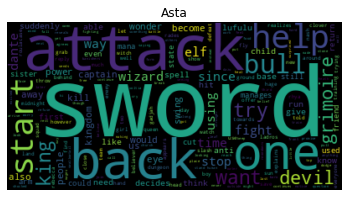

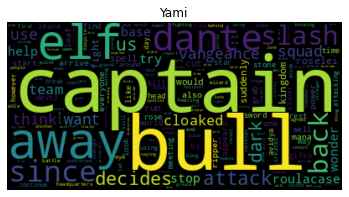

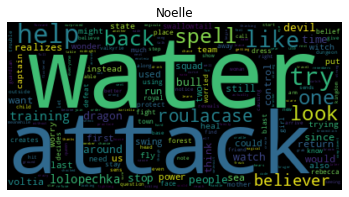

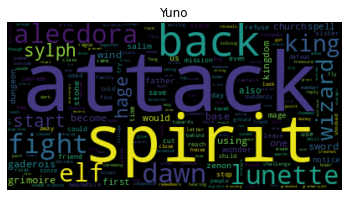

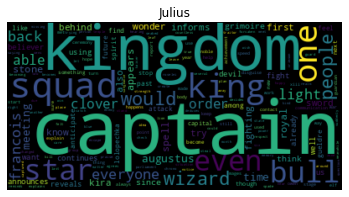

In [36]:
for character in top_5:
    words = words_by_character[character]
    words = list(filter(lambda x : x not in characters, words))
    words = list(filter(lambda x : x not in bad_verbs, words))
    words = list(filter(lambda x : x not in ['magic', 'tell', 'silva', 'sukehiro', 'novachrono', 'marx', 'black', 'knight', 'vermillion', 'ralph', 'golden'], words))
    words_as_series = pd.Series(words)
    wordcloud = generate_wordcloud_color(None, words_as_series.value_counts())
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(character)
    plt.show()

In [37]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [38]:
overused_verbs = ["tell", "say", "ask", "going", "go", "tells", "asks", "says", "get", "cannot", "use", "uses", "using", "goes", "see", "sees", "would"
                    , "Suddenly", "Meanwhile", "take", "make", "one", "back", "gets"]

In [39]:
import json

In [40]:
def write_json(to_json, filename):
    json_object = json.dumps(to_json)

    with open(filename, "w") as outfile:
        outfile.write(json_object)